Feature Scaling

Basically there dataset which might contain high value data and somtimes lower value data ie eg like higher value numbers like 355666... and lower value number 0.5 etc .while training the model values that appear more are taken and the rest that appear leat are either eliminated or made negligible ,so inorder to avoid this we use feature selection,that we make them in same manner ,ie even though its data magnitude in reduced the properties will be same .

Feature Selection Methods

*   Standarization
*   Normalization

theory
Feature Selection-Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.


Need for Feature Selection

Before implementing any technique, it is really important to understand, need for the technique and so for the Feature Selection. As we know, in machine learning, it is necessary to provide a pre-processed and good input dataset in order to get better outcomes. We collect a huge amount of data to train our model and help it to learn better. Generally, the dataset consists of noisy data, irrelevant data, and some part of useful data. Moreover, the huge amount of data also slows down the training process of the model, and with noise and irrelevant data, the model may not predict and perform well. So, it is very necessary to remove such noises and less-important data from the dataset and to do this, and Feature selection techniques are used.

Standardization-it is a very effective technique whoch re-scales a feature value so that it has a distribution with mean 0 value.and variance equals to 1

Equation                  
            Xnew=(Xi-Xmean)/std

            -----mean=0
            -----variance=1


            here the outlier will not be gone ,but reduced in a certain amount

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("loan.csv")

In [3]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\celia\AppData\Local\Temp\ipykernel_4016\1976060950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


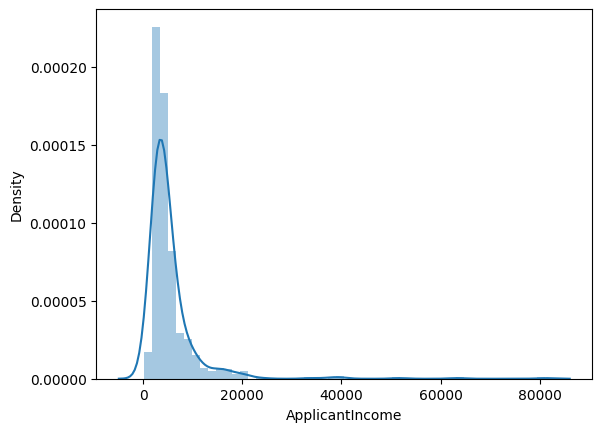

In [9]:
sns.distplot(dataset['ApplicantIncome'])
plt.show()

In [10]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss=StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])

StandardScaler()

In [18]:
dataset["Applicant_ss"] =pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]),columns=['x'])

In [19]:
dataset.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Applicant_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062


C:\Users\celia\AppData\Local\Temp\ipykernel_4016\26997750.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])
C:\Users\celia\AppData\Local\Temp\ipykernel_4016\26997750.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Applicant_ss'])


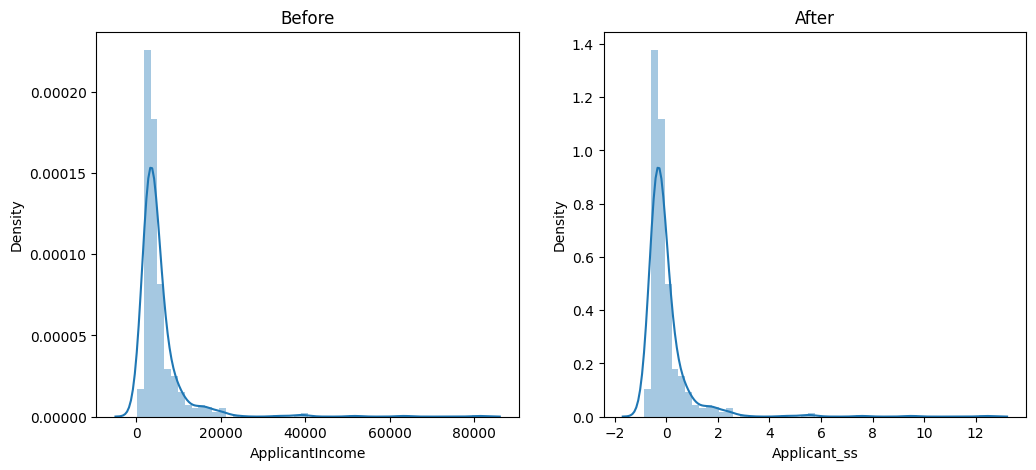

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['ApplicantIncome'])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Applicant_ss'])
plt.show()